# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

# MEDIAN HOUSEHOLD INCOME DATA

In [5]:
df_hh_income.shape

(29322, 3)

In [6]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [7]:
df_hh_income.head(3)

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575


In [8]:
df_hh_income.dtypes

Geographic Area    object
City               object
Median Income      object
dtype: object

In [9]:
df_hh_income.tail(3)

,Geographic Area,City,Median Income
29319,WY,Wright town,77114
29320,WY,Yoder town,37500
29321,WY,Y-O Ranch CDP,NaN


In [12]:
df_hh_income.isna().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [13]:
df_hh_income.duplicated().values.any() #no duplicates, only nan

False

In [14]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].fillna(0)

In [25]:
df_hh_income["Median Income"] = pd.to_numeric(df_hh_income["Median Income"])

ValueError: ignored

In [21]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].str.replace("(X)", "0")

In [24]:
df_hh_income["Median Income"][44]

'(0)'

In [27]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].str.replace("(0)", "0")

In [33]:
df_hh_income["Median Income"][44]

'0'

In [30]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].str.replace("(", "")

In [32]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].str.replace(")", "")

In [34]:
df_hh_income["Median Income"][44]

'0'

In [35]:
df_hh_income["Median Income"] = pd.to_numeric(df_hh_income["Median Income"])

ValueError: ignored

In [36]:
df_hh_income["Median Income"][71]

'-'

In [37]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].str.replace("-", "0")

In [38]:
df_hh_income["Median Income"][71]

'0'

In [39]:
df_hh_income["Median Income"] = pd.to_numeric(df_hh_income["Median Income"])

ValueError: ignored

In [40]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].str.replace(",", "")

In [41]:
df_hh_income["Median Income"] = pd.to_numeric(df_hh_income["Median Income"])

ValueError: ignored

In [42]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].str.replace("+", "")

In [43]:
df_hh_income["Median Income"] = pd.to_numeric(df_hh_income["Median Income"])

In [47]:
hh_income_avr = df_hh_income["Median Income"].mean()

In [49]:
df_hh_income.replace(0, hh_income_avr, inplace=True)

In [51]:
df_hh_income

,Geographic Area,City,Median Income
0,AL,Abanda CDP,"11,207.00"
1,AL,Abbeville city,"25,615.00"
2,AL,Adamsville city,"42,575.00"
3,AL,Addison town,"37,083.00"
4,AL,Akron town,"21,667.00"
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,nan
29318,WY,Worland city,"41,523.00"
29319,WY,Wright town,"77,114.00"
29320,WY,Yoder town,"37,500.00"


In [52]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].fillna(hh_income_avr)

In [53]:
df_hh_income["Median Income"]
#we replaced the nan by 0, changed the data type to numeric, calculated the mean, replaced the 0 back to nan and finally replace nan with the mean

0       11,207.00
1       25,615.00
2       42,575.00
3       37,083.00
4       21,667.00
           ...   
29317   48,093.05
29318   41,523.00
29319   77,114.00
29320   37,500.00
29321   48,093.05
Name: Median Income, Length: 29322, dtype: float64

# PEOPLE BELOW POVERTY DATA

In [54]:
df_pct_poverty.shape

(29329, 3)

In [55]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [56]:
df_pct_poverty.dtypes

Geographic Area    object
City               object
poverty_rate       object
dtype: object

In [57]:
df_pct_poverty.head(3)

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5


In [60]:
df_pct_poverty.duplicated().values.any()

False

In [61]:
df_pct_poverty.isnull().values.any()

False

In [62]:
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"])

ValueError: ignored

In [63]:
df_pct_poverty["poverty_rate"][573]

'-'

In [64]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].str.replace("-", "0")

In [65]:
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"])

In [67]:
poverty_rate_by_city = df_pct_poverty["poverty_rate"].mean()

In [68]:
df_pct_poverty["poverty_rate"].replace(0, poverty_rate_by_city, inplace=True)

In [70]:
df_pct_poverty["poverty_rate"][573]

16.331259163285317

In [72]:
df_pct_poverty.dtypes

Geographic Area     object
City                object
poverty_rate       float64
dtype: object

# Pct_Over_25_Completed_High_School

In [74]:
df_pct_completed_hs.shape

(29329, 3)

In [75]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [76]:
df_pct_completed_hs.dtypes

Geographic Area         object
City                    object
percent_completed_hs    object
dtype: object

In [77]:
df_pct_completed_hs.head(3)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9


In [78]:
df_pct_completed_hs.duplicated().values.any()

False

In [79]:
df_pct_completed_hs.isnull().values.any()

False

In [81]:
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"])

ValueError: ignored

In [82]:
df_pct_completed_hs["percent_completed_hs"][573]

'-'

In [83]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].str.replace("-", "0")

In [84]:
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"])

In [86]:
pct_completed_hs_mean = df_pct_completed_hs["percent_completed_hs"].mean()

In [87]:
df_pct_completed_hs["percent_completed_hs"].replace(0, pct_completed_hs_mean, inplace=True)

In [88]:
df_pct_completed_hs["percent_completed_hs"][573]

85.15793924102519

# Share_of_Race_By_City

In [89]:
df_share_race_city.shape

(29268, 7)

In [91]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [92]:
df_share_race_city.head(3)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3


In [94]:
df_share_race_city.dtypes

Geographic area          object
City                     object
share_white              object
share_black              object
share_native_american    object
share_asian              object
share_hispanic           object
dtype: object

In [95]:
df_share_race_city.duplicated().values.any()

False

In [96]:
df_share_race_city.isna().values.any()

False

In [97]:
df_share_race_city["share_black"] = pd.to_numeric(df_share_race_city["share_black"])

ValueError: ignored

In [98]:
df_share_race_city["share_black"] = df_share_race_city["share_black"].str.replace("(X)", "0")

In [99]:
df_share_race_city["share_black"][630]

'(0)'

In [100]:
df_share_race_city["share_black"] = df_share_race_city["share_black"].str.replace("(", "")
df_share_race_city["share_black"] = df_share_race_city["share_black"].str.replace(")", "")

In [101]:
df_share_race_city["share_black"] = pd.to_numeric(df_share_race_city["share_black"])

In [102]:
df_share_race_city["share_white"] = pd.to_numeric(df_share_race_city["share_white"])

ValueError: ignored

In [ ]:
df_share_race_city["share_white"]

In [103]:
df_share_race_city["share_white"] = df_share_race_city["share_white"].str.replace("(X)", "0")
df_share_race_city["share_white"] = df_share_race_city["share_white"].str.replace("(", "")
df_share_race_city["share_white"] = df_share_race_city["share_white"].str.replace(")", "")

In [104]:
df_share_race_city["share_white"] = pd.to_numeric(df_share_race_city["share_white"])

In [105]:
df_share_race_city["share_native_american"] = pd.to_numeric(df_share_race_city["share_native_american"])

ValueError: ignored

In [106]:
df_share_race_city["share_native_american"] = df_share_race_city["share_native_american"].str.replace("(X)", "0")
df_share_race_city["share_native_american"] = df_share_race_city["share_native_american"].str.replace("(", "")
df_share_race_city["share_native_american"] = df_share_race_city["share_native_american"].str.replace(")", "")

In [107]:
df_share_race_city["share_native_american"] = pd.to_numeric(df_share_race_city["share_native_american"])

In [108]:
df_share_race_city["share_asian"] = df_share_race_city["share_asian"].str.replace("(X)", "0")
df_share_race_city["share_asian"] = df_share_race_city["share_asian"].str.replace("(", "")
df_share_race_city["share_asian"] = df_share_race_city["share_asian"].str.replace(")", "")

In [109]:
df_share_race_city["share_asian"] = pd.to_numeric(df_share_race_city["share_asian"])

In [110]:
df_share_race_city["share_hispanic"] = df_share_race_city["share_hispanic"].str.replace("(X)", "0")
df_share_race_city["share_hispanic"] = df_share_race_city["share_hispanic"].str.replace("(", "")
df_share_race_city["share_hispanic"] = df_share_race_city["share_hispanic"].str.replace(")", "")
df_share_race_city["share_hispanic"] = pd.to_numeric(df_share_race_city["share_hispanic"])

In [111]:
df_share_race_city.dtypes

Geographic area           object
City                      object
share_white              float64
share_black              float64
share_native_american    float64
share_asian              float64
share_hispanic           float64
dtype: object

# Deaths_by_Police_US

In [119]:
df_fatalities.shape

(2535, 14)

In [120]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [121]:
df_fatalities.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [122]:
df_fatalities.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False


In [123]:
df_fatalities.duplicated().values.any()

False

In [124]:
df_fatalities.isnull().values.any()

True

In [289]:
df_fatalities.isnull().sum()

id                          0
name                        0
date                        0
manner_of_death             0
armed                       0
age                         0
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       65
body_camera                 0
dtype: int64

In [278]:
df_fatalities.race.nunique()

6

In [275]:
df_fatalities.age.fillna(0, inplace=True)

In [280]:
df_fatalities.race.fillna("W", inplace=True)

In [288]:
df_fatalities.armed.fillna("undetermined", inplace=True)

In [293]:
df_fatalities.flee.fillna("Not fleeing", inplace=True)

In [294]:
df_fatalities.isnull().values.any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [130]:
df_pct_poverty.head(2)

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.80
1,AL,Abbeville city,29.10


In [211]:
poverty_rate_per_state = df_pct_poverty.groupby("Geographic Area").mean()
poverty_rate_per_state.head(5)

,poverty_rate
Geographic Area,
AK,21.44
AL,21.31
AR,23.51
AZ,27.08
CA,18.25


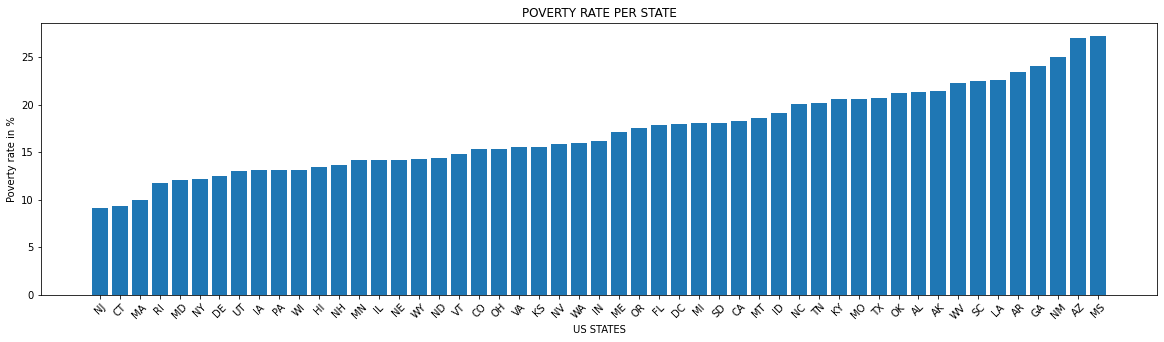

In [163]:
plt.figure(figsize=(20, 5))
plt.bar(x=poverty_rate_per_state.index, height=poverty_rate_per_state.poverty_rate)
plt.xlabel("US STATES")
plt.ylabel("Poverty rate in %")
plt.title("POVERTY RATE PER STATE")
plt.xticks(rotation = 45)
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [164]:
df_pct_completed_hs.head(2)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.20
1,AL,Abbeville city,69.10


In [207]:
completed_hs_pct_by_state = df_pct_completed_hs.groupby("Geographic Area").mean().sort_values(by="percent_completed_hs")
completed_hs_pct_by_state

,percent_completed_hs
Geographic Area,
AK,85.38
AL,80.31
AR,79.95
AZ,80.92
CA,82.11
CO,90.04
CT,91.59
DC,89.30
DE,88.52


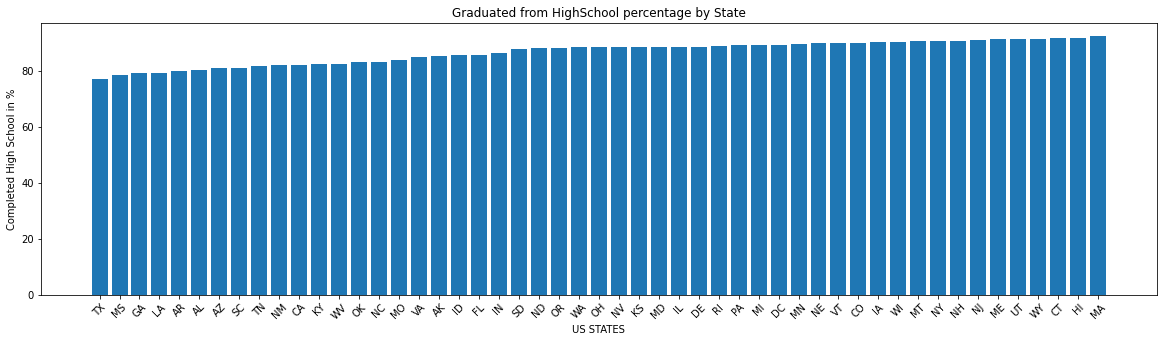

In [169]:
plt.figure(figsize=(20, 5))
plt.bar(x=completed_hs_pct_by_state.index, height= completed_hs_pct_by_state.percent_completed_hs)
plt.xlabel("US STATES")
plt.ylabel("Completed High School in %")
plt.xticks(rotation = 45)
plt.title("Graduated from HighSchool percentage by State")
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

No handles with labels found to put in legend.


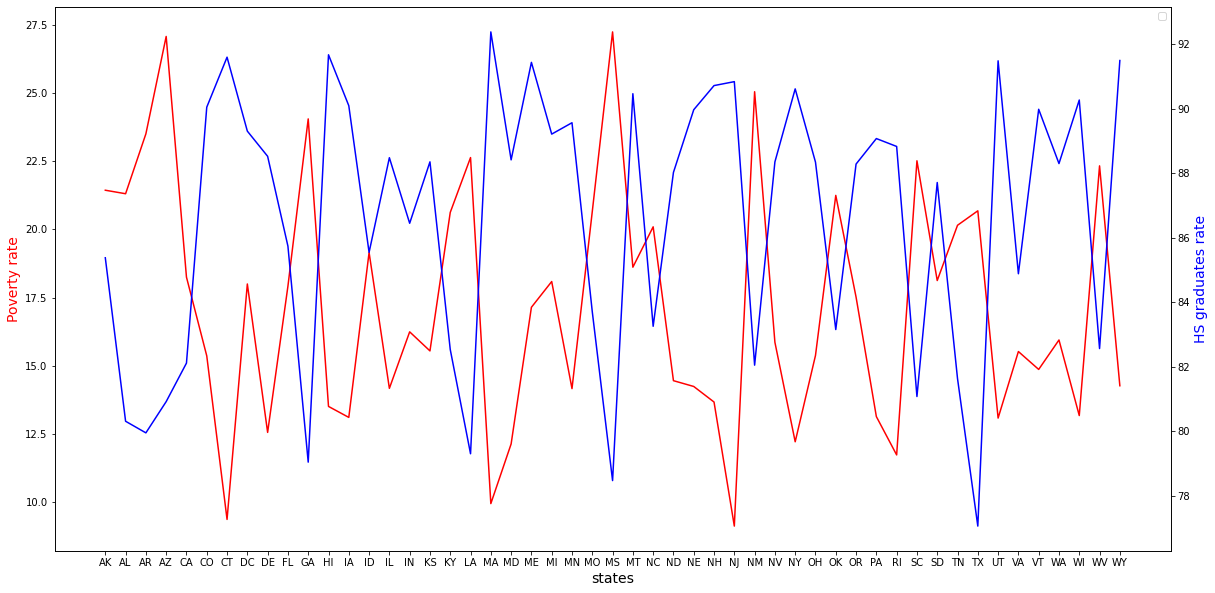

In [208]:
poverty_rate_per_state = df_pct_poverty.groupby("Geographic Area").mean()
completed_hs_pct_by_state = df_pct_completed_hs.groupby("Geographic Area").mean()
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(poverty_rate_per_state.index, poverty_rate_per_state.poverty_rate, color="red")
# set x-axis label
ax.set_xlabel("states",fontsize=14)
# set y-axis label
ax.set_ylabel("Poverty rate",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(completed_hs_pct_by_state.percent_completed_hs,color="blue")
ax2.set_ylabel("HS graduates rate",color="blue",fontsize=14)
plt.legend()
plt.show()



#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [219]:
df_share_race_city.head(2)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10


In [223]:
share_of_race_per_state = df_share_race_city.groupby("Geographic area").mean()

In [261]:
#plt.figure(figsize=(20, 10))
#width = 0.2
#plt.bar(x=share_of_race_per_state.index, height=share_of_race_per_state.share_white, stacked=True)
#plt.bar(x=share_of_race_per_state.index, height=share_of_race_per_state.share_black, stacked=False)
#plt.bar(x=share_of_race_per_state.index, height=share_of_race_per_state.share_native_american, stacked=False)
#plt.bar(x=share_of_race_per_state.index, height=share_of_race_per_state.share_asian, stacked=False)
#plt.bar(x=share_of_race_per_state.index, height=share_of_race_per_state.share_hispanic, stacked=False)
#plt.xlabel("states")
#plt.ylabel("race %")
#plt.legend(["White", "Black", "Native", "Asian", "Hispanic"])


import plotly.graph_objects as go
animals=share_of_race_per_state.index

fig = go.Figure(data=[
    go.Bar(name='White', x=animals, y=share_of_race_per_state.share_white),
    go.Bar(name='Black', x=animals, y=share_of_race_per_state.share_black),
    go.Bar(name='Native', x=animals, y=share_of_race_per_state.share_native_american),
    go.Bar(name='Asian', x=animals, y=share_of_race_per_state.share_asian),
    go.Bar(name='Hispanic', x=animals, y=share_of_race_per_state.share_hispanic)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [301]:
df_fatalities.race.value_counts()

W    1396
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [303]:
fig = px.pie(df_fatalities.race.value_counts(), values=df_fatalities.race.value_counts().values, names=df_fatalities.race.value_counts().index, title='Poeple Killed By Race')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [306]:
df_fatalities.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [307]:
fig = px.pie(df_fatalities.gender.value_counts(), values=df_fatalities.gender.value_counts().values, names=df_fatalities.gender.value_counts().index, title='Poeple Killed By Gender')
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [371]:
df_fatalities[["age", "manner_of_death", "gender"]]
gender_mannerofdeath = df_fatalities.groupby(["manner_of_death", "gender"])["id"].count()
gender_mannerofdeath.index[0:4]
gender_mannerofdeath.index.get_level_values('manner_of_death')

Index(['shot', 'shot', 'shot and Tasered', 'shot and Tasered'], dtype='object', name='manner_of_death')

In [317]:
fig = px.box(df_fatalities[["age", "manner_of_death", "gender"]], x="manner_of_death", y="age")
fig.show()

In [378]:
fig = px.box(gender_mannerofdeath,x=gender_mannerofdeath.index.get_level_values('manner_of_death'),
             color=gender_mannerofdeath.index.get_level_values('gender'),
             y="id")
fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [386]:
df_fatalities[df_fatalities["armed"] != "unarmed"].shape[0]

2364

In [383]:
df_fatalities.shape[0]

2535

In [387]:
df_fatalities[df_fatalities["armed"] != "unarmed"].shape[0]/df_fatalities.shape[0]

0.9325443786982248

In [388]:
armed_deceased = df_fatalities[df_fatalities["armed"] != "unarmed"]

In [403]:
armed_deceased_1 = armed_deceased.groupby("armed").count()


In [405]:
fig = px.pie(armed_deceased_1,
             values=armed_deceased_1.id,
             names=armed_deceased_1.index)
fig.show()

In [415]:
print((df_fatalities[df_fatalities["armed"] == "unarmed"].shape[0]/df_fatalities.shape[0])*100)
print((df_fatalities[df_fatalities["armed"] == "gun"].shape[0]/df_fatalities.shape[0])*100)

6.7455621301775155
55.14792899408284


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [421]:
df_fatalities.age.shape[0]

2535

In [425]:
df_fatalities[df_fatalities["age"]<25].shape[0]

527

In [426]:
(df_fatalities[df_fatalities["age"]<25].shape[0]/df_fatalities.age.shape[0])*100

20.78895463510848

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

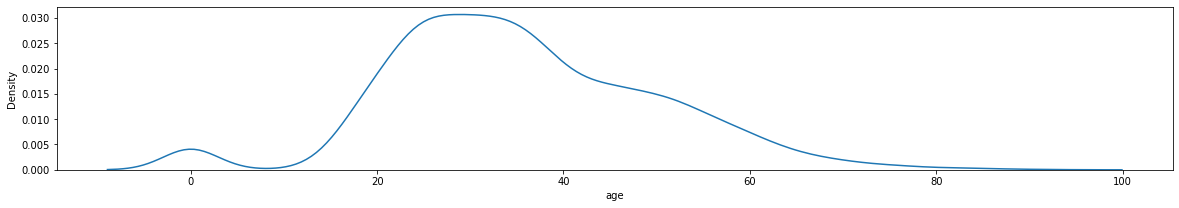

In [427]:
sns.kdeplot(data=df_fatalities, x="age")

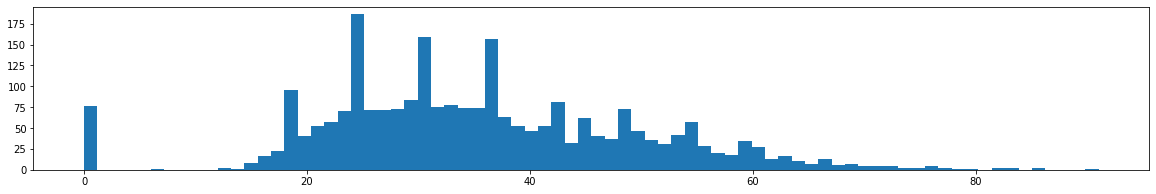

In [430]:
plt.hist(x=df_fatalities.age, bins=76)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [445]:
df_fatalities.groupby("race").count()

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
race,,,,,,,,,,,,,
A,39,39,39,39,39,39,39,39,39,39,39,39,39
B,618,618,618,618,618,618,618,618,618,618,618,618,618
H,423,423,423,423,423,423,423,423,423,423,423,423,423
N,31,31,31,31,31,31,31,31,31,31,31,31,31
O,28,28,28,28,28,28,28,28,28,28,28,28,28
W,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396


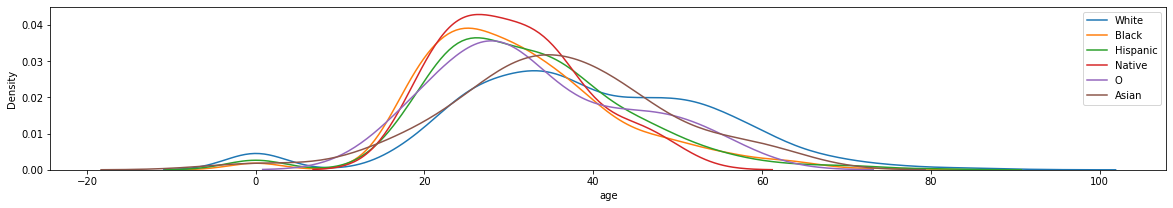

In [449]:
sns.kdeplot(data=df_fatalities[df_fatalities["race"]=="W"], x="age", )
sns.kdeplot(data=df_fatalities[df_fatalities["race"]=="B"], x="age")
sns.kdeplot(data=df_fatalities[df_fatalities["race"]=="H"], x="age")
sns.kdeplot(data=df_fatalities[df_fatalities["race"]=="N"], x="age")
sns.kdeplot(data=df_fatalities[df_fatalities["race"]=="O"], x="age")
sns.kdeplot(data=df_fatalities[df_fatalities["race"]=="A"], x="age")
plt.legend(labels=["White", "Black", "Hispanic", "Native", "O", "Asian"])

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [450]:
df_fatalities.groupby("race").count()

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
race,,,,,,,,,,,,,
A,39,39,39,39,39,39,39,39,39,39,39,39,39
B,618,618,618,618,618,618,618,618,618,618,618,618,618
H,423,423,423,423,423,423,423,423,423,423,423,423,423
N,31,31,31,31,31,31,31,31,31,31,31,31,31
O,28,28,28,28,28,28,28,28,28,28,28,28,28
W,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396


In [453]:
fig = px.pie(df_fatalities.groupby("race").count(), values=df_fatalities.groupby("race").count().id, names=df_fatalities.groupby("race").count().index, title='Poeple Killed By Race')
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [455]:
df_fatalities.groupby("signs_of_mental_illness").count()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,threat_level,flee,body_camera
signs_of_mental_illness,,,,,,,,,,,,,
False,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902
True,633,633,633,633,633,633,633,633,633,633,633,633,633


In [474]:
633/df_fatalities.shape[0]

0.24970414201183433

In [475]:
1-633/df_fatalities.shape[0]

0.7502958579881657

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [483]:
df_fatalities.groupby("city").count().sort_values("race", ascending=False).head(10)

,id,name,date,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
city,,,,,,,,,,,,,
Los Angeles,39,39,39,39,39,39,39,39,39,39,39,39,39
Phoenix,31,31,31,31,31,31,31,31,31,31,31,31,31
Houston,27,27,27,27,27,27,27,27,27,27,27,27,27
Chicago,25,25,25,25,25,25,25,25,25,25,25,25,25
Las Vegas,21,21,21,21,21,21,21,21,21,21,21,21,21
San Antonio,20,20,20,20,20,20,20,20,20,20,20,20,20
Columbus,19,19,19,19,19,19,19,19,19,19,19,19,19
Miami,18,18,18,18,18,18,18,18,18,18,18,18,18
Austin,18,18,18,18,18,18,18,18,18,18,18,18,18


In [484]:
fig = px.pie(df_fatalities.groupby("city").count().sort_values("race", ascending=False).head(10),
             values=df_fatalities.groupby("city").count().sort_values("race", ascending=False).head(10).id,
             names=df_fatalities.groupby("city").count().sort_values("race", ascending=False).head(10).index)
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [507]:
df_share_race_city[df_share_race_city["City"] == "Los Angeles city"]

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
2714,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50


In [503]:
df_fatalities[df_fatalities["city"] == "Los Angeles"].race.value_counts()

H    19
B    10
W     9
A     1
Name: race, dtype: int64

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [531]:
import plotly.express as px

fig = px.choropleth(crimes_by_states, locations=crimes_by_states.index, color=crimes_by_states.id, color_continuous_scale="sunsetdark", locationmode='USA-states', scope="usa")
fig.show()

In [525]:
crimes_by_states = df_fatalities.groupby("state").count()
crimes_by_states

,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera
state,,,,,,,,,,,,,
AK,15,15,15,15,15,15,15,15,15,15,15,15,15
AL,50,50,50,50,50,50,50,50,50,50,50,50,50
AR,26,26,26,26,26,26,26,26,26,26,26,26,26
AZ,118,118,118,118,118,118,118,118,118,118,118,118,118
CA,424,424,424,424,424,424,424,424,424,424,424,424,424
CO,74,74,74,74,74,74,74,74,74,74,74,74,74
CT,9,9,9,9,9,9,9,9,9,9,9,9,9
DC,11,11,11,11,11,11,11,11,11,11,11,11,11
DE,8,8,8,8,8,8,8,8,8,8,8,8,8


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [533]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

In [534]:
df_fatalities.date

0      2015-02-01
1      2015-02-01
2      2015-03-01
3      2015-04-01
4      2015-04-01
          ...    
2530   2017-07-28
2531   2017-07-28
2532   2017-07-29
2533   2017-07-31
2534   2017-07-31
Name: date, Length: 2535, dtype: datetime64[ns]

In [540]:
import datetime
df_fatalities['year'] = pd.DatetimeIndex(df_fatalities['date']).year

In [542]:
df_fatalities.groupby("year").count()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
year,,,,,,,,,,,,,,
2015,991,991,991,991,991,991,991,991,991,991,991,991,991,991
2016,963,963,963,963,963,963,963,963,963,963,963,963,963,963
2017,581,581,581,581,581,581,581,581,581,581,581,581,581,581


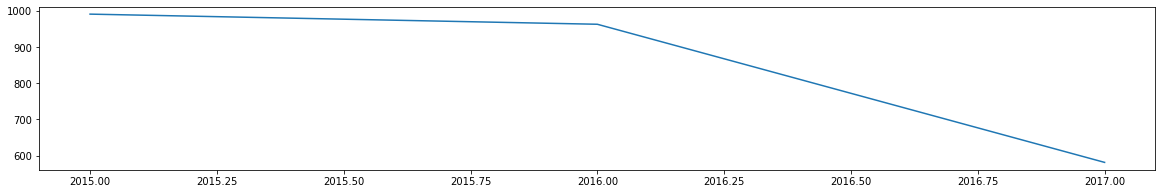

In [543]:
plt.plot(df_fatalities.groupby("year").count().index, df_fatalities.groupby("year").count().id)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).